     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
5                   4                  4                   1000   
6                   2                  7                   1750   
7                   1                 12                   3000   
8                   2                  9                   2250   
9                   5                 46                  11500   
10                  4                 23                   5750   
11                  0                  3                    750   
12                  2                 10                   2500   
13                  1                 13                   325

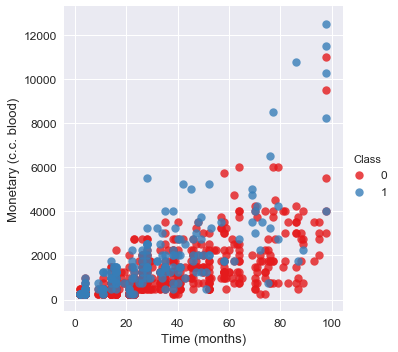

['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)']

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

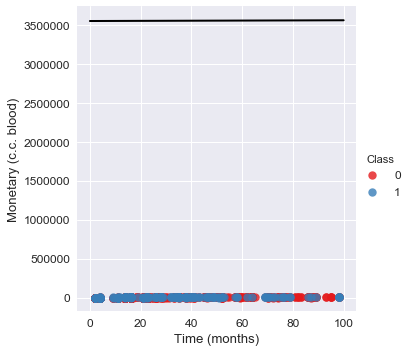

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [ ]:
print(y_pred)

In [2]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

data = r'G:\recipes_muffins_cupcakes.csv'
recipes = pd.read_csv(data)
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


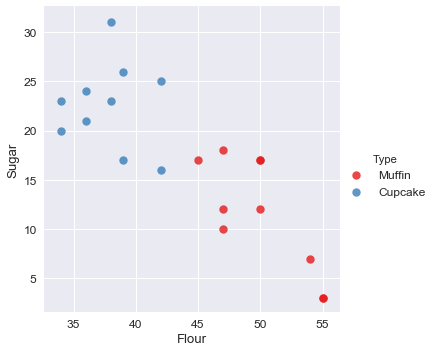

In [2]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [3]:
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [4]:

# Fit the SVM model# Fit th 
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

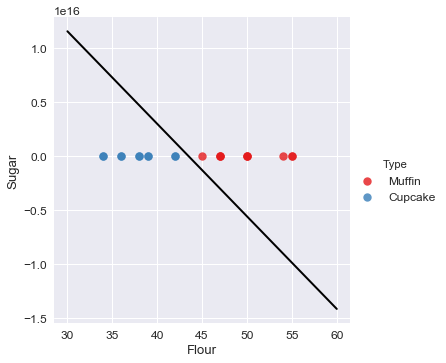

In [6]:

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [7]:
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [8]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


In [4]:
from sklearn.model_selection import train_test_split
X = recipes.drop('Type', axis=1)  
y = recipes['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = classifier.predict(X_test)
print(y_pred)

['Cupcake' 'Muffin' 'Cupcake' 'Muffin']


In [7]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
pr = classification_report(y_test, y_pred)

print(cm)
print(pr)

[[2 0]
 [0 2]]
             precision    recall  f1-score   support

    Cupcake       1.00      1.00      1.00         2
     Muffin       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4

